# DATA 620 - Assignment (Week 6)

In [114]:
# pip install python-louvain
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
import networkx
import networkx.algorithms.bipartite as bipartite
import community
import pandas
# inline matplotlib
%matplotlib inline

In [462]:
def mapGroup2Color(groupNameByNode):
    # find unique groups
    unique_groupName=numpy.unique(groupNameByNode)
    # find number of groups
    nGroups=len(unique_groupName)
    # set color map
    colorList=seaborn.color_palette("RdBu_r", nGroups)
    # define dictionary mapping group to color
    group2Color=dict()
    # iterate over group
    for iGroup in range(0,nGroups):
        # assign color for group
        group2Color[unique_groupName[iGroup]]=colorList[iGroup]
    return group2Color

## Data Description

The data we analyze below was collected by Davis et al. in the 1930s and represents observed attendance at 14 social events by 18 Southern women.  The result is a person-by-event matrix (18-by-14).

## Data Loading

We load the data set as follows:


In [519]:
# load the 
G = networkx.davis_southern_women_graph()
# determine if the graph is connected
isConnectedFlag=networkx.is_connected(G)
# determine if the graph is directed
isDirectedFlag=networkx.is_directed(G)
# determine if the graph is bipartite
isBipartiteFlag=networkx.is_bipartite(G)
# extract the top graph (Women)
women = G.graph['top']
# extract the bottom graph (Events)
events = G.graph['bottom']

## Basic Network Attributes

We can see that the network is bipartite and connected, but not directed as follows:

In [101]:
# determine if the graph is bipartite
isBipartiteFlag=networkx.is_bipartite(G)
# determine if the graph is connected
isConnectedFlag=networkx.is_connected(G)
# determine if the graph is directed
isDirectedFlag=networkx.is_directed(G)

In [102]:
isBipartiteFlag

True

In [103]:
isConnectedFlag

True

In [104]:
isDirectedFlag

False

In [94]:
G.nodes()

['Flora Price',
 'Nora Fayette',
 'E10',
 'Verne Sanderson',
 'E12',
 'E14',
 'Frances Anderson',
 'Dorothy Murchison',
 'Evelyn Jefferson',
 'Ruth DeSand',
 'Helen Lloyd',
 'Olivia Carleton',
 'Eleanor Nye',
 'E11',
 'E9',
 'E8',
 'E5',
 'E4',
 'E7',
 'E6',
 'E1',
 'Myra Liddel',
 'E3',
 'E2',
 'Theresa Anderson',
 'Pearl Oglethorpe',
 'Katherina Rogers',
 'Brenda Rogers',
 'E13',
 'Charlotte McDowd',
 'Sylvia Avondale',
 'Laura Mandeville']

In [95]:
womenNames

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [96]:
nWomen=len(women)
nWomen

18

In [97]:
events

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

In [98]:
nEvents=len(events)
nEvents

14

We can see that there are 14 events each attended by some subset of a group of 18 women.

## Bipartite Network Visualization


Compute the degree by node (i.e., number of edges adjacent to each node):

In [107]:
# degree by node
degreeByNode = G.degree()
women_degreeByNode=G.degree(women)
event_degreeByNode=G.degree(events)

In [116]:
# convert degree dictionary to dataframe
women_degreeByNodeDf=pandas.DataFrame.from_dict(women_degreeByNode,
    orient='index')
# rename column
women_degreeByNodeDf.rename(columns={0 : 'degree'},inplace=True)
# display result
women_degreeByNodeDf.sort_values(ascending=False,by=['degree'])

,degree
Theresa Anderson,8
Evelyn Jefferson,8
Nora Fayette,8
Brenda Rogers,7
Sylvia Avondale,7
Laura Mandeville,7
Katherina Rogers,6
Helen Lloyd,5
Frances Anderson,4
Ruth DeSand,4


In [117]:
# convert degree dictionary to dataframe
event_degreeByNodeDf=pandas.DataFrame.from_dict(event_degreeByNode,
    orient='index')
# rename column
event_degreeByNodeDf.rename(columns={0 : 'degree'},inplace=True)
# display result
event_degreeByNodeDf.sort_values(ascending=False,by=['degree'])

,degree
E8,14
E9,12
E7,10
E5,8
E6,8
E12,6
E3,6
E10,5
E11,4
E4,4


We can visualize the event attendance by individual as follows:

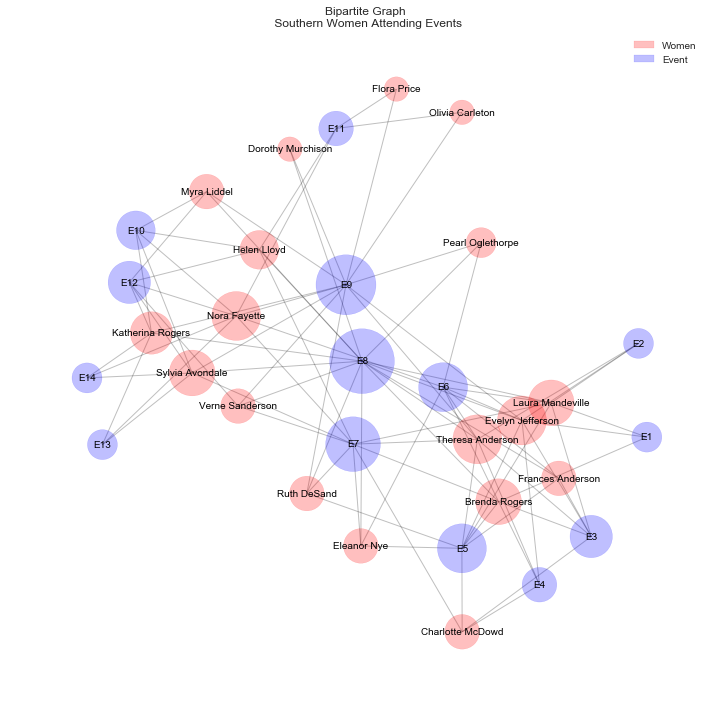

In [129]:
# define plot formatting parameters
plotFontSize=10
plotAlpha=0.25
plotLabelsFlag=True
# color list
plotColorsList=list()
# legend color patch list
legendColorPatch=list()

# define title
titleName='Bipartite Graph \n Southern Women Attending Events'
# set figure size
plt.figure(figsize=(10,10))
# add title
plt.title(titleName)

# extract labels (individual women and events)
individualAndEventLabels=degreeByNode.keys()
# extract individual women labels
individualLabels=women_degreeByNode.keys()

# iterate over labels and assign color by group
for label in individualAndEventLabels:
    # if label is an individual (women)
    if label in individualLabels:
        # set color red
        plotColorsList.append('r')
    # if event is not an individual (women) it is an event
    else:
        # set color blue
        plotColorsList.append('b')

# plot the graph (size node by degree, color by node type)
networkx.draw(G, node_size=[v*300 for v in degreeByNode.values()], 
    with_labels=plotLabelsFlag, node_color=plotColorsList, 
    alpha=plotAlpha,font_size=plotFontSize)

# add legend color patch (Women)
colorPatch=mpatches.Patch(color='r', label='Women',alpha=plotAlpha)
legendColorPatch.append(colorPatch)
# add legend color patch (Event)
colorPatch=mpatches.Patch(color='b', label='Event',alpha=plotAlpha)
legendColorPatch.append(colorPatch)

# add legend
plt.legend(handles=legendColorPatch)
# set tight layout
plt.tight_layout()
# display the graph
plt.show()

The woman-by-event adjacency matrix, $A$, is as follows: 

In [445]:
# find the adjacency matrix
Aw=bipartite.biadjacency_matrix(G,women)

In [451]:
# create the adjacency matrix table dataframe
biadjacencyMatrixTable=pandas.SparseDataFrame(Aw,index=women,columns=events)
# fill NaNs with zero
biadjacencyMatrixTable.fillna(0,inplace=True)
# display
biadjacencyMatrixTable

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
Evelyn Jefferson,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
Laura Mandeville,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Theresa Anderson,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
Brenda Rogers,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Charlotte McDowd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
Frances Anderson,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
Eleanor Nye,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
Pearl Oglethorpe,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Ruth DeSand,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Verne Sanderson,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Bipartite Graph Projections 


#### Bipartite Projected Graph - Women

$A \times A^T$ gives the number of events co‐attended by both the row and the column women (where $A$ is the adjacency matrix).

In [476]:
AxAT=Aw*Aw.transpose()

In [477]:
womenXwomenTable=pandas.SparseDataFrame(AxAT,index=women,columns=women)
# fill NaNs with zero
womenXwomenTable.fillna(0,inplace=True)
# display
womenXwomenTable

,Evelyn Jefferson,Laura Mandeville,Theresa Anderson,Brenda Rogers,Charlotte McDowd,Frances Anderson,Eleanor Nye,Pearl Oglethorpe,Ruth DeSand,Verne Sanderson,Myra Liddel,Katherina Rogers,Sylvia Avondale,Nora Fayette,Helen Lloyd,Dorothy Murchison,Olivia Carleton,Flora Price
Evelyn Jefferson,8,6.0,7,6.0,3.0,4.0,3.0,3.0,3,2,2.0,2.0,2,2,1,2.0,1.0,1.0
Laura Mandeville,6,7.0,6,6.0,3.0,4.0,4.0,2.0,3,2,1.0,1.0,2,2,2,1.0,0.0,0.0
Theresa Anderson,7,6.0,8,6.0,4.0,4.0,4.0,3.0,4,3,2.0,2.0,3,3,2,2.0,1.0,1.0
Brenda Rogers,6,6.0,6,7.0,4.0,4.0,4.0,2.0,3,2,1.0,1.0,2,2,2,1.0,0.0,0.0
Charlotte McDowd,3,3.0,4,4.0,4.0,2.0,2.0,0.0,2,1,0.0,0.0,1,1,1,0.0,0.0,0.0
Frances Anderson,4,4.0,4,4.0,2.0,4.0,3.0,2.0,2,1,1.0,1.0,1,1,1,1.0,0.0,0.0
Eleanor Nye,3,4.0,4,4.0,2.0,3.0,4.0,2.0,3,2,1.0,1.0,2,2,2,1.0,0.0,0.0
Pearl Oglethorpe,3,2.0,3,2.0,0.0,2.0,2.0,3.0,2,2,2.0,2.0,2,2,1,2.0,1.0,1.0
Ruth DeSand,3,3.0,4,3.0,2.0,2.0,3.0,2.0,4,3,2.0,2.0,3,2,2,2.0,1.0,1.0
Verne Sanderson,2,2.0,3,2.0,1.0,1.0,2.0,2.0,3,4,3.0,3.0,4,3,3,2.0,1.0,1.0


In [183]:
# project bipartite graph onto 'women' nodes
W1 = bipartite.projected_graph(G, women)

In [187]:
# project bipartite graph onto 'women' nodes
# -degrees connections of each women with other women given participation in same events
W2 = bipartite.weighted_projected_graph(G, women)
# compute degree
degreeByNodeW2=networkx.degree(W2)

In [361]:
# convert degree dictionary to dataframe
degreeByNodeW2Df=pandas.DataFrame.from_dict(degreeByNodeW2,
    orient='index')
# rename column
degreeByNodeW2Df.rename(columns={0 : 'degree'},inplace=True)
# display
#degreeByNodeW2Df.sort_values(ascending=False,by=['degree'])

#### Bipartite Projected Graph - Events

$A^T \times A$ gives the number of women who attended both the row event and the column event (where $A$ is the adjacency matrix).

In [525]:
ATxA=Aw.transpose()*Aw

In [185]:
# project bipartite graph onto 'event' nodes
E1 = bipartite.projected_graph(G, events)

In [500]:
# project bipartite graph onto 'event' nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
E2 = bipartite.weighted_projected_graph(G, events)

In [524]:
ATxA=networkx.adjacency_matrix(E2)

In [530]:
eventXeventTable=pandas.SparseDataFrame(ATxA,index=events,columns=events)
# fill NaNs with zero
eventXeventTable.fillna(0,inplace=True)
# display
eventXeventTable

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
E1,1.0,1.0,1.0,1.0,1.0,3,1,0.0,0.0,2,1,0.0,0.0,0.0
E2,1.0,2.0,1.0,2.0,1.0,3,2,0.0,0.0,2,1,0.0,0.0,0.0
E3,2.0,3.0,2.0,3.0,2.0,3,2,0.0,0.0,2,1,0.0,0.0,0.0
E4,3.0,3.0,2.0,3.0,2.0,4,4,0.0,0.0,3,1,0.0,0.0,0.0
E5,1.0,3.0,3.0,5.0,3.0,5,5,0.0,0.0,4,1,0.0,0.0,0.0
E6,2.0,4.0,3.0,4.0,3.0,5,8,6.0,3.0,3,5,2.0,4.0,2.0
E7,1.0,4.0,3.0,5.0,3.0,2,3,3.0,2.0,5,3,2.0,3.0,3.0
E8,0.0,0.0,0.0,0.0,0.0,2,5,6.0,4.0,2,5,3.0,6.0,3.0
E9,0.0,0.0,0.0,0.0,0.0,1,3,3.0,2.0,4,3,3.0,3.0,2.0
E10,2.0,5.0,3.0,5.0,3.0,4,7,6.0,3.0,2,8,3.0,5.0,3.0


### Centrality Metrics

The closeness of a node is the distance to all other nodes in the graph or in the case that the graph is not connected to all other nodes in the connected component containing that node.

Compute the closeness centrality for nodes in our bipartite network:

In [340]:
# compute closeness centrality for nodes in bipartite network
closenessCentralityByNode=networkx.closeness_centrality(W1,normalized=True)

In [341]:
# convert degree dictionary to dataframe
closenessCentralityByNodeDf=pandas.DataFrame.from_dict(closenessCentralityByNode,
    orient='index')
# rename column
closenessCentralityByNodeDf.rename(columns={0 : 'closeness'},inplace=True)
# display result
#closenessCentralityByNodeDf.sort_values(ascending=False,by=['closeness'])

Betweenness centrality of a node is the sum of the fraction of all-pairs shortest paths that pass through the node. Values of betweenness are normalized by the maximum possible value. For bipartite graphs this maximum is limited by the relative size of the two node sets.

Compute betweenness centrality for nodes in our bipartite network as follows:

In [342]:
# compute betweenness centrality for nodes in bipartite network
betweennessCentralityByNode=networkx.betweenness_centrality(W1)

In [343]:
# convert degree dictionary to dataframe
betweennessCentralityByNodeDf=pandas.DataFrame.from_dict(betweennessCentralityByNode,
    orient='index')
# rename column
betweennessCentralityByNodeDf.rename(columns={0 : 'betweenness'},inplace=True)
# display result
#betweennessCentralityByNodeDf.sort_values(ascending=False,by=['betweenness'])

The degree centrality for a node  is the fraction of nodes connected to it.

Compute the degree centrality for nodes in our bipartite network as follows:

In [344]:
# compute degree centrality for nodes in bipartite network
degreeCentralityByNode=networkx.degree_centrality(W1)

In [345]:
# convert degree dictionary to dataframe
degreeCentralityByNodeDf=pandas.DataFrame.from_dict(degreeCentralityByNode,
    orient='index')
# rename column
degreeCentralityByNodeDf.rename(columns={0 : 'degree'},inplace=True)
#
#degreeCentralityByNodeDf.sort_values(ascending=False,by=['degree'])

Compute the number of triangles associated with each node:

In [352]:
# triangles
triangesByNodeW2 = networkx.triangles(W2)

In [353]:
# convert degree dictionary to dataframe
triangesByNodeDf=pandas.DataFrame.from_dict(triangesByNodeW2,
    orient='index')
# rename column
triangesByNodeDf.rename(columns={0 : 'triangles'},inplace=True)
#
#triangesByNodeDf.sort_values(ascending=False,by=['triangles'])

Create the metric summary table:

In [355]:
# add degree and betweenness to table
metricsByNodeTable=pandas.merge(degreeCentralityByNodeDf, 
    betweennessCentralityByNodeDf, how='outer', left_index=True, right_index=True)
# add closeness to table
metricsByNodeTable=pandas.merge(metricsByNodeTable, 
    closenessCentralityByNodeDf, how='outer', left_index=True, right_index=True)
# add triangles
metricsByNodeTable=pandas.merge(metricsByNodeTable, 
    triangesByNodeDf, how='outer', left_index=True, right_index=True)

Show the centrality metrics:

In [359]:
# sort by degree
metricsByNodeTable=metricsByNodeTable.sort_values(ascending=False,by=['degree'])
# display
metricsByNodeTable

,degree,betweenness,closeness,triangles
Theresa Anderson,1.000000,0.010122,1.000000,122
Sylvia Avondale,1.000000,0.010122,1.000000,122
Ruth DeSand,1.000000,0.010122,1.000000,122
Evelyn Jefferson,1.000000,0.010122,1.000000,122
Verne Sanderson,1.000000,0.010122,1.000000,122
Helen Lloyd,1.000000,0.010122,1.000000,122
Nora Fayette,1.000000,0.010122,1.000000,122
Pearl Oglethorpe,0.941176,0.005348,0.944444,112
Dorothy Murchison,0.941176,0.005348,0.944444,112
Katherina Rogers,0.941176,0.005348,0.944444,112


Based on the centrality metrics, we identify 4 groups. One individual is not attached to a group based on degree and closeness centrality.

The same groups are identified based on the number of triangles associated with each node. The same individual is also identified as not part of a group (i.e., Charlotte McDowd).

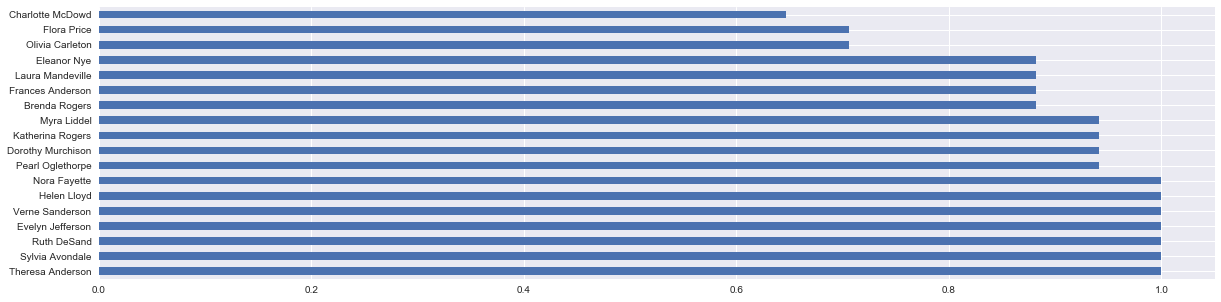

In [377]:
# set figure size
plt.figure(figsize=(20,5))
# plot degree
metricsByNodeTable['degree'].plot('barh')

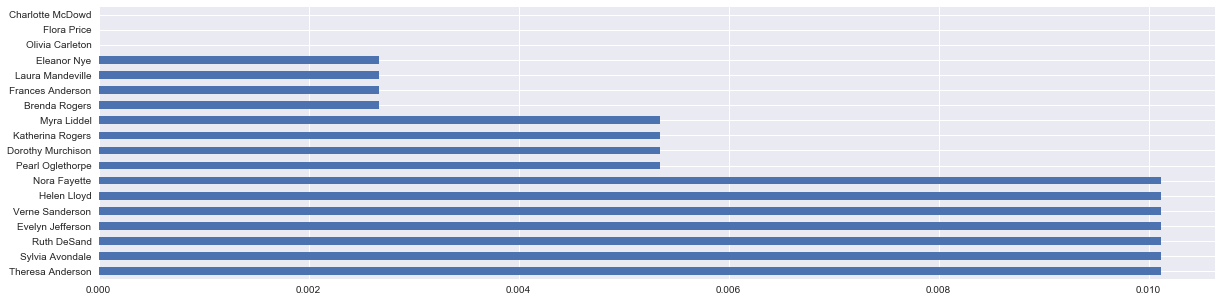

In [372]:
# set figure size
plt.figure(figsize=(20,5))
# plot degree
metricsByNodeTable['betweenness'].plot('barh')

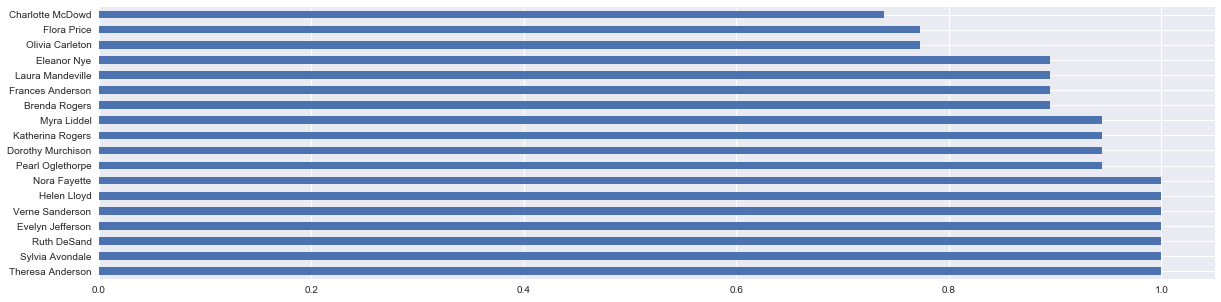

In [374]:
# set figure size
plt.figure(figsize=(20,5))
# plot degree
metricsByNodeTable['closeness'].plot('barh')

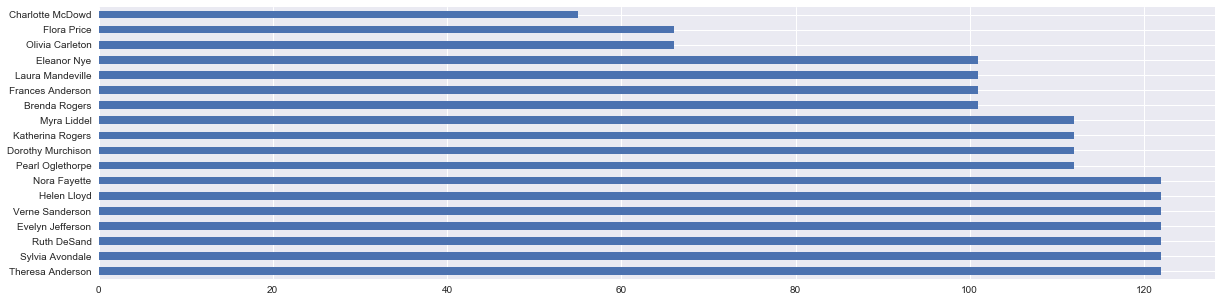

In [373]:
# set figure size
plt.figure(figsize=(20,5))
# plot degree
metricsByNodeTable['triangles'].plot('barh')

We can visualize these groups as follows:

In [531]:
# create group indices
group1Index=metricsByNodeTable['triangles']==122
group2Index=metricsByNodeTable['triangles']==112
group3Index=metricsByNodeTable['triangles']==101
group4Index=metricsByNodeTable['triangles']==66
group5Index=metricsByNodeTable['triangles']==55
# create group labels
group1Labels=list(metricsByNodeTable.loc[group1Index].index)
group2Labels=list(metricsByNodeTable.loc[group2Index].index)
group3Labels=list(metricsByNodeTable.loc[group3Index].index)
group4Labels=list(metricsByNodeTable.loc[group4Index].index)
group5Labels=list(metricsByNodeTable.loc[group5Index].index)

Based on the centrality measures, group 1 is composed of the following women:

In [415]:
group1Labels

['Theresa Anderson',
 'Sylvia Avondale',
 'Ruth DeSand',
 'Evelyn Jefferson',
 'Verne Sanderson',
 'Helen Lloyd',
 'Nora Fayette']

Based on the centrality measures, group 2 is composed of the following women:

In [417]:
group2Labels

['Pearl Oglethorpe', 'Dorothy Murchison', 'Katherina Rogers', 'Myra Liddel']

Based on the centrality measures, group 3 is composed of the following women:

In [418]:
group3Labels

['Brenda Rogers', 'Frances Anderson', 'Laura Mandeville', 'Eleanor Nye']

Based on the centrality measures, group 4 is composed of the following women:

In [419]:
group4Labels

['Olivia Carleton', 'Flora Price']

Based on the centrality measures, group 5 is composed of the following women:

In [420]:
group5Labels

['Charlotte McDowd']

Now we visualize the centrality-based groups:

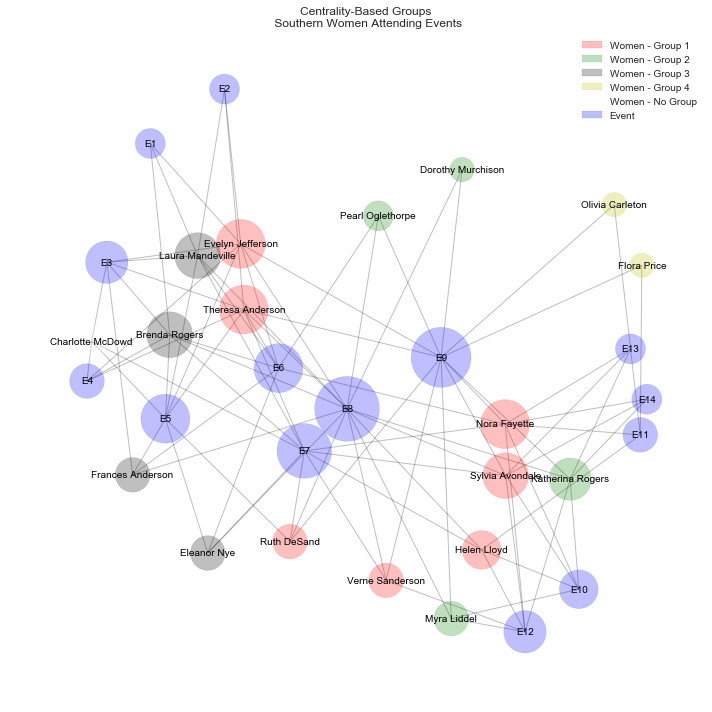

In [461]:
# define plot formatting parameters
plotFontSize=10
plotAlpha=0.25
plotLabelsFlag=True
# color list
plotColorsList=list()
# legend color patch list
legendColorPatch=list()

# define title
titleName='Centrality-Based Groups \n Southern Women Attending Events'
# set figure size
plt.figure(figsize=(10,10))
# add title
plt.title(titleName)

# extract labels (individual women and events)
individualAndEventLabels=degreeByNode.keys()
# extract individual women labels
individualLabels=women_degreeByNode.keys()

# iterate over labels and assign color by group
for label in individualAndEventLabels:
    # if label is an individual (women)
    if label in individualLabels:

        # if group 1
        if label in group1Labels:
            # set color red
            plotColorsList.append('r')
        # if group 2
        elif label in group2Labels:
            # set color green
            plotColorsList.append('g')
        # if group 3
        elif label in group3Labels:
            # set color green
            plotColorsList.append('k')
        # if group 4
        elif label in group4Labels:
            # set color green
            plotColorsList.append('y')
        # if group 5
        elif label in group5Labels:
            # set color green
            plotColorsList.append('w')            
    
    # if event is not an individual (women) it is an event
    else:
        # set color blue
        plotColorsList.append('b')

# plot the graph (size node by degree, color by node type)
networkx.draw(G, node_size=[v*300 for v in degreeByNode.values()], 
    with_labels=plotLabelsFlag, node_color=plotColorsList, 
    alpha=plotAlpha,font_size=plotFontSize)

# add legend color patch (Women - Group 1)
colorPatch=mpatches.Patch(color='r', label='Women - Group 1',alpha=plotAlpha)
legendColorPatch.append(colorPatch)
# add legend color patch (Women - Group 2)
colorPatch=mpatches.Patch(color='g', label='Women - Group 2',alpha=plotAlpha)
legendColorPatch.append(colorPatch)
# add legend color patch (Women - Group 3)
colorPatch=mpatches.Patch(color='k', label='Women - Group 3',alpha=plotAlpha)
legendColorPatch.append(colorPatch)
# add legend color patch (Women - Group 4)
colorPatch=mpatches.Patch(color='y', label='Women - Group 4',alpha=plotAlpha)
legendColorPatch.append(colorPatch)
# add legend color patch (Women - Group 5)
colorPatch=mpatches.Patch(color='w', label='Women - No Group',alpha=plotAlpha)
legendColorPatch.append(colorPatch)
# add legend color patch (Event)
colorPatch=mpatches.Patch(color='b', label='Event',alpha=plotAlpha)
legendColorPatch.append(colorPatch)

# add legend
plt.legend(handles=legendColorPatch)
# set tight layout
plt.tight_layout()
# display the graph
plt.show()

## Community Detection

In this section, we employ two methods of community detection.

### Island Method

We define functions to implement the island method of community detection:

In [236]:
def trimEdges(G, weightThreshold = 1):
    # trim of graph edges for island method
    G2 = networkx.Graph()
    for fromNode, toNode, edgeData in G.edges(data=True):
        # if weight is greater than weight threshold
        if edgeData['weight'] > weightThreshold:
            # add edge 
            G2.add_edge(fromNode,toNode,edgeData)
    # return trimmed graph
    return G2

def islandMethod(G, nIterations = 5):
    # extract weights
    weights = [edgeData['weight'] for fromNode,toNode,edgeData in G.edges(data=True)]
    # find minimum weights
    minWeights=int(min(weights))
    # find maximum weights
    maxWeights=int(max(weights))
    # find step size
    stepSize = int((maxWeights-minWeights)/nIterations)
    # weight range
    weightRange=range(minWeights,maxWeights,stepSize)
    # return number of edges removed and trimmed graph
    return [[threshold, trimEdges(G, threshold)] for threshold in weightRange]

#### Women

First, we employ the island method to identify communities as follows:

In [254]:
# find connected component subgraphs of projected graph (woman)
connectedComponentsW2=networkx.connected_component_subgraphs(W2)
# extract connected components into list
connectedComponentsListW2 = list(connectedComponentsW2)
# extract subgraph
subGraphW2=connectedComponentsListW2[0]
# apply island method
islandsW2 = islandMethod(subGraphW2)
# create table
table=list()
# iterate over island
for islandW2 in islandsW2:
    # extract island details
    row=[islandW2[0],len(islandW2[1]),len(list(networkx.connected_component_subgraphs(islandW2[1])))]
    # add island details to table
    table.append(row)
# create dataframe table
islandW2Table=pandas.DataFrame(table,columns=['depth','nWomen','nGroups'])

In [255]:
# display table
islandW2Table

,depth,nWomen,nGroups
0,1,18,1
1,2,15,1
2,3,14,2
3,4,7,2
4,5,7,2
5,6,2,1


At a depth of 3, the island method identifies 2 groups. 14 of the women are identified as belonging to a group (i.e., assigned to either group 1 or group 2). The 4 remaining women are not in either of the two groups.

We can visualize the two identified subgraphs as follows:

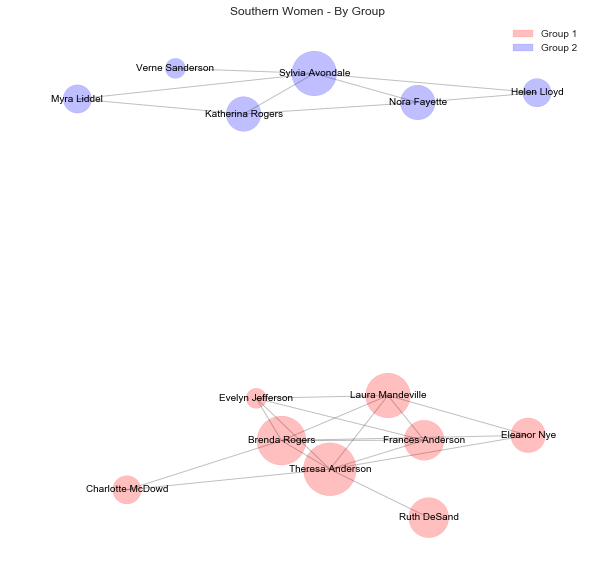

In [296]:
level=3
# apply island method (level=3)
trimmedG_W2 = trimEdges(W2, level)
# extract group 1
trimmedG_W2_g1 = list(networkx.connected_component_subgraphs(trimmedG_W2))[0]
# extract group 2
trimmedG_W2_g2 = list(networkx.connected_component_subgraphs(trimmedG_W2))[1]
# extract not in group 1 or group 2
g3 = list(set(W2.degree(women).keys()) - set(trimmedG_W2.degree(women).keys()))

# define plot formatting parameters
plotFontSize=10
plotAlpha=0.25
plotLabelsFlag=True

# color list
plotColorsList=list()
# legend color patch list
legendColorPatch=list()

# define title
titleName='Southern Women - By Group'
# set figure size
plt.figure(figsize=(10,10))
# add title
plt.title(titleName)

# compute degree of trimmed graph (level=3)
trimmedDegreeByNode_W2 = trimmedG_W2.degree()
# compute degree of trimmed graph (level=3) - group 1
degreeByNodeW2_g1=trimmedG_W2_g1.degree()
# compute degree of trimmed graph (level=3) - group 2
degreeByNodeW2_g2=trimmedG_W2_g2.degree()
# compute degree of trimmed graph (level=3) - not group 1 or group 2
degreeByNodeW2_g3=W2.degree(g3)

# extract labels (individual women and events)
individualLabels=trimmedDegreeByNode_W2.keys()
# extract individual women labels
individualLabels_g1=degreeByNodeW2_g1.keys()

# iterate over labels and assign color by group
for label in individualLabels:
    # if label is in group 1
    if label in individualLabels_g1:
        # set color red
        plotColorsList.append('r')
    # if event is not in group 1 
    else:
        # set color blue
        plotColorsList.append('b')

# plot the trimmed graph (level=3)
networkx.draw(trimmedG_W2, node_size=[v*400 for v in trimmedDegreeByNode_W2.values()], 
    with_labels=plotLabelsFlag, node_color=plotColorsList, alpha=plotAlpha, 
    font_size=plotFontSize)

# add legend color patch (Women)
colorPatch=mpatches.Patch(color='r', label='Group 1',alpha=plotAlpha)
legendColorPatch.append(colorPatch)
# add legend color patch (Event)
colorPatch=mpatches.Patch(color='b', label='Group 2',alpha=plotAlpha)
legendColorPatch.append(colorPatch)
# add legend
plt.legend(handles=legendColorPatch)
# set tight layout
#plt.tight_layout()
# display the graph
plt.show()

In [329]:
# convert degree dictionary to dataframe
degreeByNodeW2_g1Df=pandas.DataFrame.from_dict(degreeByNodeW2_g1,
    orient='index')
# rename column
degreeByNodeW2_g1Df.rename(columns={0 : 'degree group 1'},inplace=True)
# display
#degreeByNodeW2_g1Df.sort_values(ascending=False,by=['degree group 1'])

In [330]:
# convert degree dictionary to dataframe
degreeByNodeW2_g2Df=pandas.DataFrame.from_dict(degreeByNodeW2_g2,
    orient='index')
# rename column
degreeByNodeW2_g2Df.rename(columns={0 : 'degree group 2'},inplace=True)
# display
#degreeByNodeW2_g2Df.sort_values(ascending=False,by=['degree group 2'])

In [331]:
# compute degree
weightedDegreeByNodeW2=networkx.degree(W2,weight='weight')
# convert degree dictionary to dataframe
weightedDegreeByNodeW2Df=pandas.DataFrame.from_dict(weightedDegreeByNodeW2,
    orient='index')
# rename column
weightedDegreeByNodeW2Df.rename(columns={0 : 'weighted degree'},inplace=True)
# display
#weightedDegreeByNodeW2Df.sort_values(ascending=False,by=['weighted degree'])

In [324]:
# add degree to table
degreeByNodeTableW2=pandas.merge(degreeByNodeW2Df, 
    weightedDegreeByNodeW2Df, how='outer', left_index=True, right_index=True)
# add degree group 1
degreeByNodeTableW2=pandas.merge(degreeByNodeTableW2, 
    degreeByNodeW2_g1Df, how='outer', left_index=True, right_index=True)
# add degree group 2
degreeByNodeTableW2=pandas.merge(degreeByNodeTableW2, 
    degreeByNodeW2_g2Df, how='outer', left_index=True, right_index=True)
# join degree annd betweenness
#degreeByNodeTable=pandas.merge(degreeByNodeTable, 
#    degreeByNodeW2_g3Df, how='inner', left_index=True, right_index=True)
degreeByNodeTableW2.fillna('',inplace=True)

The degree and weighted degree for the weighted projected graph and the subgraphs created using the island method are summarized below:

In [328]:
# display
degreeByNodeTableW2.sort_values(ascending=False,by=['degree group 2','degree group 1'])

,degree,weighted degree,degree group 1,degree group 2
Dorothy Murchison,16,24,,
Flora Price,12,14,,
Olivia Carleton,12,14,,
Pearl Oglethorpe,16,31,,
Theresa Anderson,17,57,7,
Brenda Rogers,15,46,6,
Laura Mandeville,15,45,5,
Evelyn Jefferson,17,50,4,
Frances Anderson,15,32,4,
Eleanor Nye,15,36,3,


We can see that Dorothy Murchison, Flora Price, Olivia Carleton, and Pearl Oglethorpe are not in either group 1 or group 2.

Group 1 is composed of 8 individuals (Theresa Anderson, Brenda Rogers, Laura Mandeville, Evelyn Jefferson, Frances Anderson, Eleanor Nye, Charlotte McDowd, and Ruth DeSand).

Group 2 is composed of 6 individuals (Sylvia Avondale, Katherina Rogers, Nora Fayette, Helen Lloyd, Myra Liddel, and Verne Sanderson).


Theresa Anderson - with a weighted degree of 57 connections with others through her event attendance - was connected to 7 other idividuals in group 1. Based on her weighted degree, she was the most connected individual in group 1.

Sylvia Avondale - with a weighted degree of 46 connections with others through her event attendance - was connected to 5 other idividuals in group 2. Based on her weighted degree, she was the most connected individual in group 2.



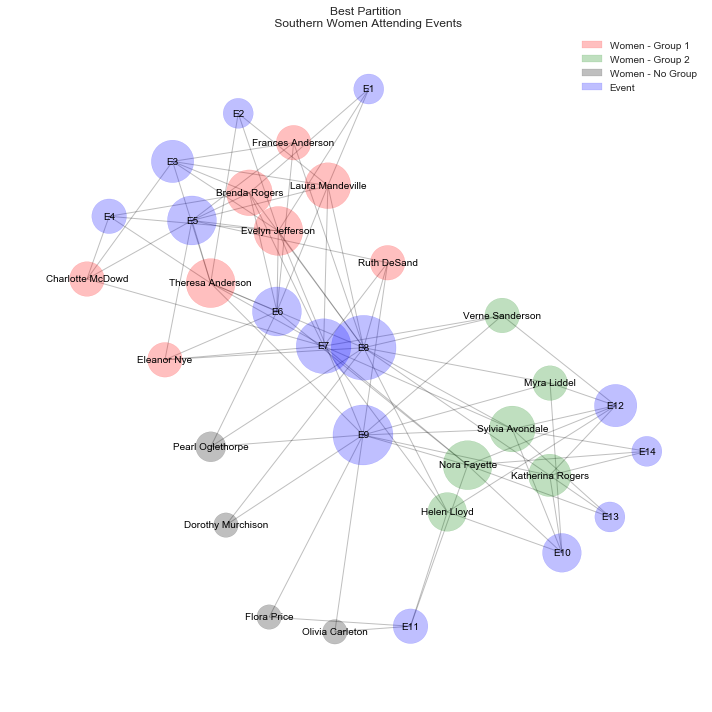

In [396]:
# define plot formatting parameters
plotFontSize=10
plotAlpha=0.25
plotLabelsFlag=True
# color list
plotColorsList=list()
# legend color patch list
legendColorPatch=list()

# define title
titleName='Best Partition \n Southern Women Attending Events'
# set figure size
plt.figure(figsize=(10,10))
# add title
plt.title(titleName)

# extract labels (individual women and events)
individualAndEventLabels=degreeByNode.keys()
# extract individual women labels
individualLabels=women_degreeByNode.keys()

# compute degree of trimmed graph (level=3) - group 1
group1Labels=degreeByNodeW2_g1.keys()
# compute degree of trimmed graph (level=3) - group 2
group2Labels=degreeByNodeW2_g2.keys()
# compute degree of trimmed graph (level=3) - not group 1 or group 2
group3Labels=degreeByNodeW2_g3.keys()


# iterate over labels and assign color by group
for label in individualAndEventLabels:
    # if label is an individual (women)
    if label in individualLabels:
        
        group=partition[label]
        # if group 1
        if label in group1Labels:
            # set color red
            plotColorsList.append('r')
        # if group 2
        elif label in group2Labels:
            # set color green
            plotColorsList.append('g')
        elif label in group3Labels:
            # set color green
            plotColorsList.append('k')
    
    # if event is not an individual (women) it is an event
    else:
        # set color blue
        plotColorsList.append('b')

# plot the graph (size node by degree, color by node type)
networkx.draw(G, node_size=[v*300 for v in degreeByNode.values()], 
    with_labels=plotLabelsFlag, node_color=plotColorsList, 
    alpha=plotAlpha,font_size=plotFontSize)

# add legend color patch (Women - Group 1)
colorPatch=mpatches.Patch(color='r', label='Women - Group 1',alpha=plotAlpha)
legendColorPatch.append(colorPatch)
# add legend color patch (Women - Group 2)
colorPatch=mpatches.Patch(color='g', label='Women - Group 2',alpha=plotAlpha)
legendColorPatch.append(colorPatch)
# add legend color patch (Women - Group 3)
colorPatch=mpatches.Patch(color='k', label='Women - No Group',alpha=plotAlpha)
legendColorPatch.append(colorPatch)

# add legend color patch (Event)
colorPatch=mpatches.Patch(color='b', label='Event',alpha=plotAlpha)
legendColorPatch.append(colorPatch)

# add legend
plt.legend(handles=legendColorPatch)
# set tight layout
plt.tight_layout()
# display the graph
plt.show()

Based on the above visualization we can see that E6, E7, E8, and E9 appear to be events that bridge group 1 and group 2.

#### Events

Next we look for event communities using the island method.

In [252]:
# find connected component subgraphs of projected graph (events)
connectedComponentsE2=networkx.connected_component_subgraphs(E2)
# extract connected components into list
connectedComponentsListE2 = list(connectedComponentsE2)
# extract subgraph
subGraphE2=connectedComponentsListE2[0]
# apply island method
islandsE2 = islandMethod(subGraphE2)
# create table
table=list()
# iterate over island
for islandE2 in islandsE2:
    # extract island details
    row=[islandE2[0],len(islandE2[1]),len(list(networkx.connected_component_subgraphs(islandE2[1])))]
    # add island details to table
    table.append(row)
# create dataframe table
islandE2Table=pandas.DataFrame(table,columns=['depth','nEvents','nGroups'])

In [253]:
islandE2Table

,depth,nEvents,nGroups
0,1,14,1
1,2,14,1
2,3,9,1
3,4,8,1
4,5,6,1
5,6,5,1
6,7,3,1
7,8,2,1


There are no event subgroups identified by the island method.

We compute the degree of the event projection:

In [402]:
# compute degree
degreeByNodeE2=networkx.degree(E2)
# convert degree dictionary to dataframe
degreeByNodeE2Df=pandas.DataFrame.from_dict(degreeByNodeE2,
    orient='index')
# rename column
degreeByNodeE2Df.rename(columns={0 : 'degree'},inplace=True)
# display
#degreeByNodeE2Df.sort_values(ascending=False,by=['degree'])

We compute the weighted degree of the event projection:

In [401]:
# compute degree
weightedDegreeByNodeE2=networkx.degree(E2,weight='weight')
# convert degree dictionary to dataframe
weightedDegreeByNodeE2Df=pandas.DataFrame.from_dict(weightedDegreeByNodeE2,
    orient='index')
# rename column
weightedDegreeByNodeE2Df.rename(columns={0 : 'weighted degree'},inplace=True)
# display
#weightedDegreeByNodeE2Df.sort_values(ascending=False,by=['weighted degree'])

In [406]:
# create event table with degree and weighted degree
degreeByNodeTableE2Df=pandas.merge(degreeByNodeE2Df, 
    weightedDegreeByNodeE2Df, how='outer', left_index=True, right_index=True)
# fill NaNs with empty string
degreeByNodeTableE2Df.fillna('',inplace=True)

In [407]:
degreeByNodeTableE2Df.sort_values(ascending=False,by=['weighted degree'])

,degree,weighted degree
E8,13,59
E7,13,48
E9,13,46
E6,13,41
E5,8,38
E3,8,32
E12,8,28
E10,8,25
E4,8,23
E2,8,20


Event, E8, is the most important event. 13 women attended event E8.

E5-E9 are the top 5 events.

The least important event is E11.

### Best Partition


We define the best partition as the partition of highest modularity (i.e. the highest partition of the dendrogram generated by the Louvain algorithm).

Compute the best partition of the graph as follows:

In [311]:
# first compute the best partition
partition = community.best_partition(W2)

Create a table to summarize the metrics:

In [378]:
# convert degree dictionary to dataframe
partitionDf=pandas.DataFrame.from_dict(partition,
    orient='index')
# rename column
partitionDf.rename(columns={0 : 'best partition'},inplace=True)
# display result
#partitionDf.sort_values(ascending=False,by=['partition'])

In [383]:
# add partition to degree summary table
summaryTableW2=pandas.merge(degreeByNodeTableW2, 
    partitionDf, how='outer', left_index=True, right_index=True)
# fill NaNs with empty string
summaryTableW2.fillna('',inplace=True)

In [384]:
summaryTableW2.sort_values(ascending=False,by=['degree group 2','degree group 1'])

,degree,weighted degree,degree group 1,degree group 2,best partition
Dorothy Murchison,16,24,,,1
Flora Price,12,14,,,1
Olivia Carleton,12,14,,,1
Pearl Oglethorpe,16,31,,,1
Theresa Anderson,17,57,7,,0
Brenda Rogers,15,46,6,,0
Laura Mandeville,15,45,5,,0
Evelyn Jefferson,17,50,4,,0
Frances Anderson,15,32,4,,0
Eleanor Nye,15,36,3,,0


Notice that the 4 women not assigned a group when we used the island method were assigned to group 2 when we use the best partition method. Both methods identify the same individuals in group 1.

We can visualize the groups as follows:

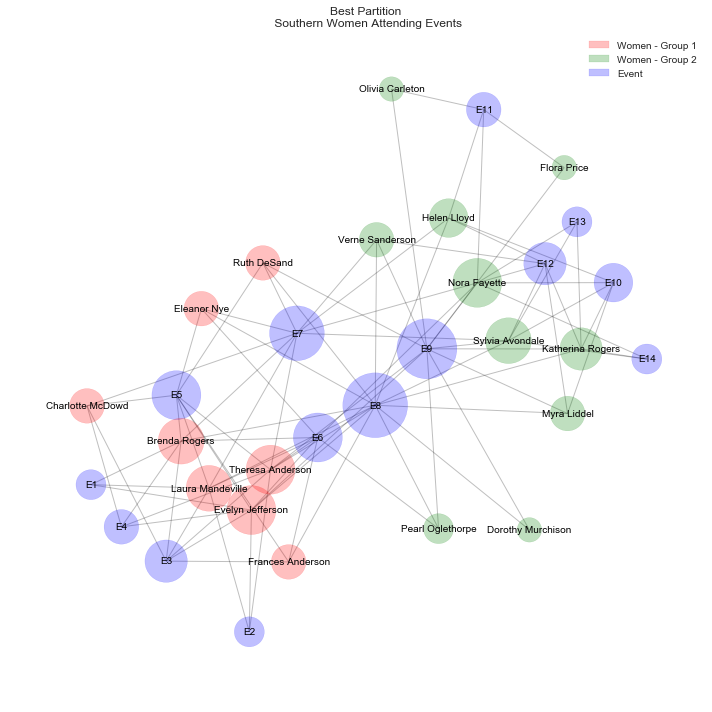

In [390]:
# define plot formatting parameters
plotFontSize=10
plotAlpha=0.25
plotLabelsFlag=True
# color list
plotColorsList=list()
# legend color patch list
legendColorPatch=list()

# define title
titleName='Best Partition \n Southern Women Attending Events'
# set figure size
plt.figure(figsize=(10,10))
# add title
plt.title(titleName)

# extract labels (individual women and events)
individualAndEventLabels=degreeByNode.keys()
# extract individual women labels
individualLabels=women_degreeByNode.keys()

# iterate over labels and assign color by group
for label in individualAndEventLabels:
    # if label is an individual (women)
    if label in individualLabels:
        
        group=partition[label]
        # if group 1
        if group == 0:
            # set color red
            plotColorsList.append('r')
        # if group 2
        elif group == 1:
            # set color green
            plotColorsList.append('g')
    
    # if event is not an individual (women) it is an event
    else:
        # set color blue
        plotColorsList.append('b')

# plot the graph (size node by degree, color by node type)
networkx.draw(G, node_size=[v*300 for v in degreeByNode.values()], 
    with_labels=plotLabelsFlag, node_color=plotColorsList, 
    alpha=plotAlpha,font_size=plotFontSize)

# add legend color patch (Women - Group 1)
colorPatch=mpatches.Patch(color='r', label='Women - Group 1',alpha=plotAlpha)
legendColorPatch.append(colorPatch)
# add legend color patch (Women - Group 2)
colorPatch=mpatches.Patch(color='g', label='Women - Group 2',alpha=plotAlpha)
legendColorPatch.append(colorPatch)
# add legend color patch (Event)
colorPatch=mpatches.Patch(color='b', label='Event',alpha=plotAlpha)
legendColorPatch.append(colorPatch)

# add legend
plt.legend(handles=legendColorPatch)
# set tight layout
plt.tight_layout()
# display the graph
plt.show()

## Conclusion

Our analysis identified two main groups within the total set of Southern Women under study. Both the island method and the best partition approach identified essentially the same groups. The 4 women not assigned a group when we used the island method were assigned to group 2 when we used the best partition method.

We computed a number of metrics, including centrality measures (betweenness, closeness, and degree) and the number triangles. Based on all of these measures we can infer the basic structure of the social interactions.
By examining patterns of which women are present (or absent) at which events, it is possible to infer an underlying pattern of social links and groupings among the women. By examining which women were present at the 14 events, it is possible to infer underlying patterns in the similarity of the events.

Based on weighted degree, E8 is the most important event, while E11 is least important event. The events that our analysis identified as important appear to be so not only because they have a high degree, but also because they were attended by women from both groups and hence act as a connection between the two communities.

## References

Kouznetsov, A. & Tsvetovat, M. (2011) Social Network Analysis for Startups. O’Reilly Media.

Blondel, V. D., Guillaume, J., Lambiotte, R., & Lefebvre, R. (2008) Fast Unfolding of Communities in Large Networks. Journal of Statistical Mechanics: Theory and Experiment.